In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

import random
# from branca.element import Template, MacroElement
#from geopy.distance import geodesic
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, make_scorer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 290)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df_ = pd.read_csv('hemnet_lastt.csv')
df = df_.copy()

In [4]:
df2 = df[df['balcony'].notna()]
df2['balcony'] = df2['balcony'].map({'Ja' : 1, 'Nej' : 0})

In [5]:
df2.head()

,street,property_type,build_year,ownership_type,housing_form,living_area,land_area,county,area,price,wanted_price,latitude,longitude,fee,operating_cost,rooms,floor,balcony,construction_date,association,broker,url,price_change,story,sold_year,sold_month,sold_date
0,Östra Hamngatan 2,Lägenhet,2011-01-01,Bostadsrätt,APARTMENT,61.00000,0.00000,Västerås,Östra Hamnen,2750000,2595000.00000,59.60582,16.55453,3008.00000,0,2.00000,NaN,1,0,NaN,Notar,https://www.hemnet.se/salda/lagenhet-2rum-ostr...,0.06000,"3, hiss finns",2021,5,2021-05-01
1,Läckövägen 26 *ACCEPTERAT PRIS*,Lägenhet,1943-01-01,Bostadsrätt,APARTMENT,52.00000,0.00000,Stockholms,Hammarbyhöjden/Björkhagen,3650000,3357758.70178,59.29561,18.11201,3005.00000,0,3.00000,NaN,1,0,NaN,Svenska Mäklarhuset Johanneshov,https://www.hemnet.se/salda/lagenhet-3rum-hamm...,0.10000,"3 av 3, hiss finns ej",2023,3,2023-03-01
5,Kronogatan 35,Lägenhet,1962-01-01,Bostadsrätt,APARTMENT,43.00000,0.00000,Vänersborgs,Nordstan,660000,590000.00000,58.38168,12.32775,2865.00000,0,1.00000,NaN,1,0,NaN,Mäklarhuset Vänersborg,https://www.hemnet.se/salda/lagenhet-1rum-nord...,0.12000,NaN,2019,7,2019-07-01
8,Bredmansgatan 4D,Lägenhet,1945-01-01,Bostadsrätt,APARTMENT,59.00000,0.00000,Uppsala,Luthagen,2150000,2195000.00000,59.86019,17.61567,2893.00000,0,2.00000,NaN,1,0,NaN,Widerlöv Uppsala,https://www.hemnet.se/salda/lagenhet-2rum-luth...,0.02000,NaN,2020,4,2020-04-01
17,Lasarettsgatan 9,Lägenhet,1988-01-01,Bostadsrätt,APARTMENT,63.00000,0.00000,Jönköpings,Väster,1925000,1800000.00000,57.77921,14.15755,3992.00000,0,2.00000,NaN,1,0,NaN,Länsförsäkringar Fastighetsförmedling Jönköping,https://www.hemnet.se/salda/lagenhet-2rum-vast...,0.07000,"4 av 5, hiss finns",2021,1,2021-01-01


In [6]:
df2.drop(columns = ['property_type'], inplace=True)

In [7]:
df3 = df[df['balcony'].isna()]
df3 = df3.sample(72000, random_state=42)

In [8]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                 'association', 'broker', 'story' ,'fee','url', 'build_year', 'sold_date', 'floor', 'construction_date']

In [9]:
dfd2 = pd.get_dummies(df2, columns=one_hot_columns, drop_first=True, dtype=int)
dfd2 = dfd2.drop(columns=drop_columns)
dfd2.head()

,living_area,price,wanted_price,rooms,balcony,price_change,housing_form_APARTMENT,housing_form_ESTATE_WITHOUT_CULTIVATION,housing_form_FORESTING_ESTATE,housing_form_HOMESTEAD,housing_form_HOUSE,housing_form_LINKED_HOUSE,housing_form_OTHER,housing_form_PLOT,housing_form_ROW_HOUSE,housing_form_TERRACED_HOUSE,housing_form_TWIN_HOUSE,housing_form_VACATION_HOME,housing_form_VACATION_HOUSE,housing_form_WINTERIZED_VACATION_HOME,ownership_type_Andelsboende,ownership_type_Annat,ownership_type_Bostadsrätt,ownership_type_Tomträtt,ownership_type_Äganderätt,county_Alingsås,county_Alvesta,county_Aneby,county_Arboga,county_Arjeplogs,county_Arvika,county_Askersunds,county_Avesta,county_Bengtsfors,county_Bergs,county_Bjurholms,county_Bjuvs,county_Bodens,county_Bollebygds,county_Bollnäs,county_Borgholms,county_Borlänge,county_Borås,county_Botkyrka,county_Boxholms,county_Bromölla,county_Bräcke,county_Burlövs,county_Båstads,county_Dals-Eds,county_Danderyds,county_Degerfors,county_Dorotea,county_Eda,county_Ekerö,county_Eksjö,county_Emmaboda,county_Enköpings,county_Eskilstuna,county_Eslövs,county_Essunga,county_Fagersta,county_Falkenbergs,county_Falköpings,county_Falu,county_Filipstads,county_Finspångs,county_Flens,county_Forshaga,county_Färgelanda,county_Gagnefs,county_Gislaveds,county_Gnesta,county_Gnosjö,county_Gotlands,county_Grums,county_Grästorps,county_Gullspångs,county_Gällivare,county_Gävle,county_Göteborgs,county_Götene,county_Habo,county_Hagfors,county_Hallsbergs,county_Hallstahammars,county_Halmstads,county_Hammarö,county_Haninge,county_Haparanda,county_Heby,county_Hedemora,county_Helsingborgs,county_Herrljunga,county_Hjo,county_Hofors,county_Huddinge,county_Hudiksvalls,county_Hultsfreds,county_Hylte,county_Hällefors,county_Härjedalens,county_Härnösands,county_Härryda,county_Hässleholms,county_Håbo,county_Höganäs,county_Högsby,county_Hörby,county_Höörs,county_Jokkmokks,county_Järfälla,county_Jönköpings,county_Kalix,county_Kalmar,county_Karlsborgs,county_Karlshamns,county_Karlskoga,county_Karlskrona,county_Karlstads,county_Katrineholms,county_Kils,county_Kinda,county_Kiruna,county_Klippans,county_Knivsta,county_Kramfors,county_Kristianstads,county_Kristinehamns,county_Krokoms,county_Kumla,county_Kungsbacka,county_Kungsörs,county_Kungälvs,county_Kävlinge,county_Köpings,county_Laholms,county_Landskrona,county_Laxå,county_Lekebergs,county_Leksands,county_Lerums,county_Lessebo,county_Lidingö,county_Lidköpings,county_Lilla Edets,county_Lindesbergs,county_Linköpings,county_Ljungby,county_Ljusdals,county_Ljusnarsbergs,county_Lomma,county_Ludvika,county_Luleå,county_Lunds,county_Lycksele,county_Lysekils,county_Malmö,county_Malung-Sälens,county_Malå,county_Mariestads,county_Markaryds,county_Marks,county_Melleruds,county_Mjölby,county_Mora,county_Motala,county_Mullsjö,county_Munkedals,county_Munkfors,county_Mölndals,county_Mönsterås,county_Mörbylånga,county_Nacka,county_Nora,county_Norbergs,county_Nordanstigs,county_Nordmalings,county_Norrköpings,county_Norrtälje,county_Norsjö,county_Nybro,county_Nykvarns,county_Nyköpings,county_Nynäshamns,county_Nässjö,county_Ockelbo,county_Olofströms,county_Orsa,county_Orust,county_Osby,county_Oskarshamns,county_Ovanåkers,county_Oxelösunds,county_Pajala,county_Partille,county_Perstorps,county_Piteå,county_Ragunda,county_Robertsfors,county_Ronneby,county_Rättviks,county_Sala,county_Salems,county_Sandvikens,county_Sigtuna,county_Simrishamns,county_Sjöbo,county_Skara,county_Skellefteå,county_Skinnskattebergs,county_Skurups,county_Skövde,county_Smedjebackens,county_Sollefteå,county_Sollentuna,county_Solna,county_Sotenäs,county_Staffanstorps,county_Stenungsunds,county_Stockholms,county_Storfors,county_Storumans,county_Strängnäs,county_Strömstads,county_Strömsunds,county_Sundbybergs,county_Sundsvalls,county_Sunne,county_Surahammars,county_Svalövs,county_Svedala,county_Svenljunga,county_Säffle,county_Säters,county_Sävsjö,county_Söderhamns,county_Söderköpings,county_Södertälje,county_Sölvesborgs,county_Tanums,county_Tib

In [10]:
dfd2['price'] = dfd2['price'] / 100000
dfd2['wanted_price'] = dfd2['wanted_price'] / 100000

In [11]:
X = dfd2.drop('balcony', axis=1)
y = dfd2['balcony']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
Mm = MinMaxScaler()

In [14]:
X_train_scaled = Mm.fit_transform(X_train)
X_test_scaled = Mm.transform(X_test)

In [16]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [17]:
xgb = XGBClassifier()

In [18]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
xgb_pred = xgb.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [21]:
accuracy_score(y_test, xgb_pred)

0.8116792885430417

In [23]:
lgb = LGBMClassifier(verbose = -1)

In [24]:
lgb.fit(X_train_scaled, y_train)

LGBMClassifier(verbose=-1)

In [25]:
lgb_pred = lgb.predict(X_test_scaled)

In [26]:
accuracy_score(y_test, lgb_pred)

0.8094038768845967

In [28]:
cb = CatBoostClassifier(verbose = False)

In [29]:
cb.fit(X_train_scaled, y_train)

In [30]:
cb_pred = cb.predict(X_test_scaled)

In [31]:
accuracy_score(y_test, cb_pred)

0.8158479816577503

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression()

In [34]:
log.fit(X_train_scaled, y_train)

C:\Users\oguzh\PycharmProjects\hemnet_last\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
log_pred = log.predict(X_test_scaled)

In [36]:
accuracy_score(y_test, log_pred)

0.7941534079066213

In [38]:
cm = confusion_matrix(y_test, cb_pred)

In [40]:
cm

array([[ 2674,  9230],
       [ 1372, 44296]], dtype=int64)

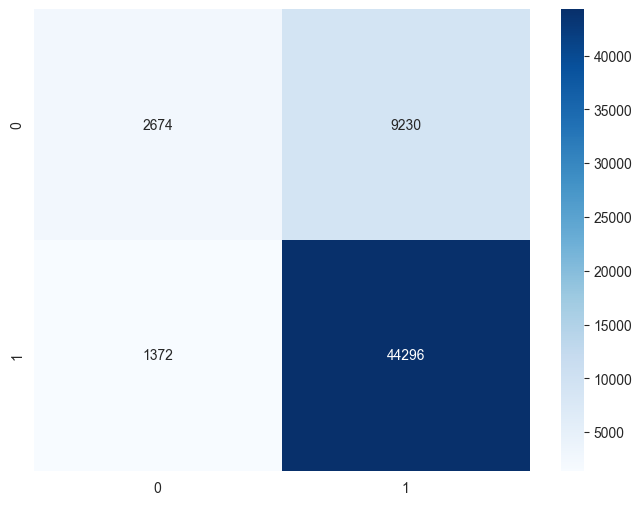

In [52]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
f1_score(y_test, cb_pred)

0.893118535395286

In [49]:
acc_xgb = accuracy_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)
acc_lgb = accuracy_score(y_test, lgb_pred)
f1_lgb = f1_score(y_test, lgb_pred)
acc_cb = accuracy_score(y_test, cb_pred)
f1_cb = f1_score(y_test, cb_pred)

In [50]:
data = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [acc_xgb, acc_lgb, acc_cb],
    'F1 Score': [f1_xgb, f1_lgb, f1_cb]
}
metrics_df_class = pd.DataFrame(data)
metrics_df_class

,Model,Accuracy,F1 Score
0,XGBoost,0.81168,0.89115
1,LightGBM,0.80940,0.89009
2,CatBoost,0.81585,0.89312


In [51]:
metrics_df_class.to_csv('metrics_df_class.csv', index = False)

In [53]:
dflast = pd.concat([df2, df3], axis = 0)

In [59]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                 'association', 'broker', 'story' ,'fee','url', 'build_year', 'sold_date', 'floor', 'construction_date', 'property_type']

In [60]:
dfdlast = pd.get_dummies(dflast, columns = one_hot_columns, dtype = int, drop_first = True)
dfdlast.drop(columns = drop_columns, inplace = True)
dfdlast['price'] = dfdlast['price'] / 100000
dfdlast['wanted_price'] = dfdlast['wanted_price'] / 100000

In [61]:
dfdlast

,living_area,price,wanted_price,rooms,balcony,price_change,housing_form_APARTMENT,housing_form_ESTATE_WITHOUT_CULTIVATION,housing_form_FORESTING_ESTATE,housing_form_HOMESTEAD,housing_form_HOUSE,housing_form_LINKED_HOUSE,housing_form_OTHER,housing_form_PLOT,housing_form_ROW_HOUSE,housing_form_TERRACED_HOUSE,housing_form_TWIN_HOUSE,housing_form_VACATION_HOME,housing_form_VACATION_HOUSE,housing_form_WINTERIZED_VACATION_HOME,ownership_type_Andelsboende,ownership_type_Annat,ownership_type_Bostadsrätt,ownership_type_Information saknas,ownership_type_Tomträtt,ownership_type_Äganderätt,county_Alingsås,county_Alvesta,county_Aneby,county_Arboga,county_Arjeplogs,county_Arvidsjaurs,county_Arvika,county_Askersunds,county_Avesta,county_Bengtsfors,county_Bergs,county_Bjurholms,county_Bjuvs,county_Bodens,county_Bollebygds,county_Bollnäs,county_Borgholms,county_Borlänge,county_Borås,county_Botkyrka,county_Boxholms,county_Bromölla,county_Bräcke,county_Burlövs,county_Båstads,county_Dals-Eds,county_Danderyds,county_Degerfors,county_Dorotea,county_Eda,county_Ekerö,county_Eksjö,county_Emmaboda,county_Enköpings,county_Eskilstuna,county_Eslövs,county_Essunga,county_Fagersta,county_Falkenbergs,county_Falköpings,county_Falu,county_Filipstads,county_Finspångs,county_Flens,county_Forshaga,county_Färgelanda,county_Gagnefs,county_Gislaveds,county_Gnesta,county_Gnosjö,county_Gotlands,county_Grums,county_Grästorps,county_Gullspångs,county_Gällivare,county_Gävle,county_Göteborgs,county_Götene,county_Habo,county_Hagfors,county_Hallsbergs,county_Hallstahammars,county_Halmstads,county_Hammarö,county_Haninge,county_Haparanda,county_Heby,county_Hedemora,county_Helsingborgs,county_Herrljunga,county_Hjo,county_Hofors,county_Huddinge,county_Hudiksvalls,county_Hultsfreds,county_Hylte,county_Hällefors,county_Härjedalens,county_Härnösands,county_Härryda,county_Hässleholms,county_Håbo,county_Höganäs,county_Högsby,county_Hörby,county_Höörs,county_Jokkmokks,county_Järfälla,county_Jönköpings,county_Kalix,county_Kalmar,county_Karlsborgs,county_Karlshamns,county_Karlskoga,county_Karlskrona,county_Karlstads,county_Katrineholms,county_Kils,county_Kinda,county_Kiruna,county_Klippans,county_Knivsta,county_Kramfors,county_Kristianstads,county_Kristinehamns,county_Krokoms,county_Kumla,county_Kungsbacka,county_Kungsörs,county_Kungälvs,county_Kävlinge,county_Köpings,county_Laholms,county_Landskrona,county_Laxå,county_Lekebergs,county_Leksands,county_Lerums,county_Lessebo,county_Lidingö,county_Lidköpings,county_Lilla Edets,county_Lindesbergs,county_Linköpings,county_Ljungby,county_Ljusdals,county_Ljusnarsbergs,county_Lomma,county_Ludvika,county_Luleå,county_Lunds,county_Lycksele,county_Lysekils,county_Malmö,county_Malung-Sälens,county_Malå,county_Mariestads,county_Markaryds,county_Marks,county_Melleruds,county_Mjölby,county_Mora,county_Motala,county_Mullsjö,county_Munkedals,county_Munkfors,county_Mölndals,county_Mönsterås,county_Mörbylånga,county_Nacka,county_Nora,county_Norbergs,county_Nordanstigs,county_Nordmalings,county_Norrköpings,county_Norrtälje,county_Norsjö,county_Nybro,county_Nykvarns,county_Nyköpings,county_Nynäshamns,county_Nässjö,county_Ockelbo,county_Olofströms,county_Orsa,county_Orust,county_Osby,county_Oskarshamns,county_Ovanåkers,county_Oxelösunds,county_Pajala,county_Partille,county_Perstorps,county_Piteå,county_Ragunda,county_Robertsfors,county_Ronneby,county_Rättviks,county_Sala,county_Salems,county_Sandvikens,county_Sigtuna,county_Simrishamns,county_Sjöbo,county_Skara,county_Skellefteå,county_Skinnskattebergs,county_Skurups,county_Skövde,county_Smedjebackens,county_Sollefteå,county_Sollentuna,county_Solna,county_Sotenäs,county_Staffanstorps,county_Stenungsunds,county_Stockholms,county_Storfors,county_Storumans,county_Strängnäs,county_Strömstads,county_Strömsunds,county_Sundbybergs,county_Sundsvalls,county_Sunne,county_Surahammars,county_Svalövs,county_Svedala,county_Svenljunga,county_Säffle,county_Säters,county_Sävsjö,county_Söderhamns,county_Söderköpings,county_S

In [62]:
train = dfdlast[dfdlast['balcony'].notna()]
test = dfdlast[dfdlast['balcony'].isna()]

In [63]:
X_train = train.drop(columns = 'balcony')
X_test = test.drop(columns = 'balcony')
y_train = train['balcony']
y_test = test['balcony']

In [65]:
Mm = MinMaxScaler()

In [66]:
X_train = Mm.fit_transform(X_train)
X_test = Mm.transform(X_test)

In [67]:
cb.fit(X_train, y_train)

In [68]:
cb_pred = cb.predict(X_test)

In [69]:
df3['balcony'] = cb_pred

balcony
1    67897
0     4103
Name: count, dtype: int64

In [73]:
df4 = df3.copy()

In [74]:
df4['price'] = np.nan

In [75]:
df4 = pd.concat([df2, df4])

In [77]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                 'association', 'broker', 'story' ,'fee','url', 'build_year', 'sold_date', 'floor', 'construction_date', 'property_type']

In [78]:
dfdlast2 = pd.get_dummies(df4, columns = one_hot_columns, dtype = int, drop_first = True)
dfdlast2.drop(columns = drop_columns, inplace = True)
dfdlast2

,living_area,price,wanted_price,rooms,balcony,price_change,housing_form_APARTMENT,housing_form_ESTATE_WITHOUT_CULTIVATION,housing_form_FORESTING_ESTATE,housing_form_HOMESTEAD,housing_form_HOUSE,housing_form_LINKED_HOUSE,housing_form_OTHER,housing_form_PLOT,housing_form_ROW_HOUSE,housing_form_TERRACED_HOUSE,housing_form_TWIN_HOUSE,housing_form_VACATION_HOME,housing_form_VACATION_HOUSE,housing_form_WINTERIZED_VACATION_HOME,ownership_type_Andelsboende,ownership_type_Annat,ownership_type_Bostadsrätt,ownership_type_Information saknas,ownership_type_Tomträtt,ownership_type_Äganderätt,county_Alingsås,county_Alvesta,county_Aneby,county_Arboga,county_Arjeplogs,county_Arvidsjaurs,county_Arvika,county_Askersunds,county_Avesta,county_Bengtsfors,county_Bergs,county_Bjurholms,county_Bjuvs,county_Bodens,county_Bollebygds,county_Bollnäs,county_Borgholms,county_Borlänge,county_Borås,county_Botkyrka,county_Boxholms,county_Bromölla,county_Bräcke,county_Burlövs,county_Båstads,county_Dals-Eds,county_Danderyds,county_Degerfors,county_Dorotea,county_Eda,county_Ekerö,county_Eksjö,county_Emmaboda,county_Enköpings,county_Eskilstuna,county_Eslövs,county_Essunga,county_Fagersta,county_Falkenbergs,county_Falköpings,county_Falu,county_Filipstads,county_Finspångs,county_Flens,county_Forshaga,county_Färgelanda,county_Gagnefs,county_Gislaveds,county_Gnesta,county_Gnosjö,county_Gotlands,county_Grums,county_Grästorps,county_Gullspångs,county_Gällivare,county_Gävle,county_Göteborgs,county_Götene,county_Habo,county_Hagfors,county_Hallsbergs,county_Hallstahammars,county_Halmstads,county_Hammarö,county_Haninge,county_Haparanda,county_Heby,county_Hedemora,county_Helsingborgs,county_Herrljunga,county_Hjo,county_Hofors,county_Huddinge,county_Hudiksvalls,county_Hultsfreds,county_Hylte,county_Hällefors,county_Härjedalens,county_Härnösands,county_Härryda,county_Hässleholms,county_Håbo,county_Höganäs,county_Högsby,county_Hörby,county_Höörs,county_Jokkmokks,county_Järfälla,county_Jönköpings,county_Kalix,county_Kalmar,county_Karlsborgs,county_Karlshamns,county_Karlskoga,county_Karlskrona,county_Karlstads,county_Katrineholms,county_Kils,county_Kinda,county_Kiruna,county_Klippans,county_Knivsta,county_Kramfors,county_Kristianstads,county_Kristinehamns,county_Krokoms,county_Kumla,county_Kungsbacka,county_Kungsörs,county_Kungälvs,county_Kävlinge,county_Köpings,county_Laholms,county_Landskrona,county_Laxå,county_Lekebergs,county_Leksands,county_Lerums,county_Lessebo,county_Lidingö,county_Lidköpings,county_Lilla Edets,county_Lindesbergs,county_Linköpings,county_Ljungby,county_Ljusdals,county_Ljusnarsbergs,county_Lomma,county_Ludvika,county_Luleå,county_Lunds,county_Lycksele,county_Lysekils,county_Malmö,county_Malung-Sälens,county_Malå,county_Mariestads,county_Markaryds,county_Marks,county_Melleruds,county_Mjölby,county_Mora,county_Motala,county_Mullsjö,county_Munkedals,county_Munkfors,county_Mölndals,county_Mönsterås,county_Mörbylånga,county_Nacka,county_Nora,county_Norbergs,county_Nordanstigs,county_Nordmalings,county_Norrköpings,county_Norrtälje,county_Norsjö,county_Nybro,county_Nykvarns,county_Nyköpings,county_Nynäshamns,county_Nässjö,county_Ockelbo,county_Olofströms,county_Orsa,county_Orust,county_Osby,county_Oskarshamns,county_Ovanåkers,county_Oxelösunds,county_Pajala,county_Partille,county_Perstorps,county_Piteå,county_Ragunda,county_Robertsfors,county_Ronneby,county_Rättviks,county_Sala,county_Salems,county_Sandvikens,county_Sigtuna,county_Simrishamns,county_Sjöbo,county_Skara,county_Skellefteå,county_Skinnskattebergs,county_Skurups,county_Skövde,county_Smedjebackens,county_Sollefteå,county_Sollentuna,county_Solna,county_Sotenäs,county_Staffanstorps,county_Stenungsunds,county_Stockholms,county_Storfors,county_Storumans,county_Strängnäs,county_Strömstads,county_Strömsunds,county_Sundbybergs,county_Sundsvalls,county_Sunne,county_Surahammars,county_Svalövs,county_Svedala,county_Svenljunga,county_Säffle,county_Säters,county_Sävsjö,county_Söderhamns,county_Söderköpings,county_S

In [79]:
dfdlast2['price'] = dfdlast2['price'] / 100000
dfdlast2['wanted_price'] = dfdlast2['wanted_price'] / 100000

In [80]:
train = dfdlast2[dfdlast2['price'].notna()]
test = dfdlast2[dfdlast2['price'].isna()]

In [81]:
X_train = train.drop(columns = 'price')
X_test = test.drop(columns = 'price')
y_train = train['price']
y_test = test['price']